<a href="https://colab.research.google.com/github/zecakpm/Python_machine_learning/blob/master/leads_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Lead scoring model**

Steps:
* feature selection
* split dataset
* data engineering
 - categorical variables >> dummy variables 
 - numerical variables >> scaled variables
* train model (Radom Forest Classifier)
* feature importance rank



##**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

Reference material
https://towardsdatascience.com/a-true-end-to-end-ml-example-lead-scoring-f5b52e9a3c80

In [ ]:
#connecting with personal frive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#open file
df = open('/content/drive/My Drive/Colab Notebooks/Projects/leads_scoring/Leads_cleaned.csv')

In [ ]:
df = pd.read_csv(df,index_col=0)

##**Lower case column names**

In [ ]:
df.columns = map(str.lower, df.columns)

In [ ]:
df.head()

,prospect id,lead number,lead origin,lead source,do not email,do not call,converted,totalvisits,total time spent on website,page views per visit,last activity,country,specialization,what is your current occupation,what matters most to you in choosing a course,search,magazine,newspaper article,x education forums,newspaper,digital advertisement,through recommendations,receive more updates about our courses,tags,lead quality,update me on supply chain content,get updates on dm content,city,i agree to pay the amount through cheque,a free copy of mastering the interview,last notable activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [ ]:
df.shape

(9074, 31)

In [ ]:
df.columns

Index(['prospect id', 'lead number', 'lead origin', 'lead source',
       'do not email', 'do not call', 'converted', 'totalvisits',
       'total time spent on website', 'page views per visit', 'last activity',
       'country', 'specialization', 'what is your current occupation',
       'what matters most to you in choosing a course', 'search', 'magazine',
       'newspaper article', 'x education forums', 'newspaper',
       'digital advertisement', 'through recommendations',
       'receive more updates about our courses', 'tags', 'lead quality',
       'update me on supply chain content', 'get updates on dm content',
       'city', 'i agree to pay the amount through cheque',
       'a free copy of mastering the interview', 'last notable activity'],
      dtype='object')

##**Feature selection**
* Columns for the model

In [ ]:
cat_vars = ['lead origin',
            'lead source',
            'last activity',
            'specialization',
            'what is your current occupation',
            'what matters most to you in choosing a course',
            'city',
            'last notable activity']

num_vars = ['totalvisits',
          'total time spent on website',
          'page views per visit']

target_label = ['converted']

all = cat_vars + num_vars + target_label

In [ ]:
df = df[all].copy()

In [ ]:
df.shape

(9074, 12)

##**Split Dataset**

In [ ]:
X = df.drop(target_label, axis=1)
y = df[target_label]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.7,
                                                    test_size=0.3,
                                                    random_state=333
                                                    )

##**Adding Dummy Variables**
* Categorical variables >> Dummy variables

In [ ]:
X_train[cat_vars] = X_train[cat_vars].apply(lambda x: x.str.lower())
X_test[cat_vars] = X_test[cat_vars].apply(lambda x: x.str.lower())

In [ ]:
X_test.head()

,lead origin,lead source,last activity,specialization,what is your current occupation,what matters most to you in choosing a course,city,last notable activity,totalvisits,total time spent on website,page views per visit
1461,api,google,olark chat conversation,others,unemployed,better career prospects,mumbai,modified,5.0,71,5.00
7926,api,direct traffic,olark chat conversation,others,unemployed,better career prospects,mumbai,modified,4.0,233,1.33
1909,landing page submission,google,email opened,marketing management,unemployed,better career prospects,other cities of maharashtra,email opened,5.0,431,2.50
8971,landing page submission,direct traffic,email opened,media and advertising,unemployed,better career prospects,mumbai,modified,4.0,1776,4.00
5310,landing page submission,direct traffic,sms sent,international business,unemployed,better career prospects,other cities,sms sent,4.0,101,4.00


In [ ]:
columns = X_train.columns.to_list()
for var in columns:
  if var in cat_vars:
    X_train[var] = pd.get_dummies(X_train[var])
    X_test[var] = pd.get_dummies(X_test[var])

In [ ]:
X_train.head()

,lead origin,lead source,last activity,specialization,what is your current occupation,what matters most to you in choosing a course,city,last notable activity,totalvisits,total time spent on website,page views per visit
7635,0,0,0,0,0,1,0,0,1.0,345,1.00
7276,1,0,0,0,0,1,1,0,3.0,641,1.50
8724,0,0,0,0,0,1,0,0,3.0,389,3.00
8314,0,0,0,0,0,1,1,0,11.0,1002,3.67
5033,0,0,0,0,0,1,1,0,14.0,302,3.50


##**Scalling numerical columns**

In [ ]:
scaler = StandardScaler()
scaler_num_var = scaler.fit(df[num_vars])
X_train[num_vars] = scaler_num_var.transform(X_train[num_vars])
X_test[num_vars] = scaler_num_var.transform(X_test[num_vars])

In [ ]:
X_test.head()

,lead origin,lead source,last activity,specialization,what is your current occupation,what matters most to you in choosing a course,city,last notable activity,totalvisits,total time spent on website,page views per visit
1461,1,0,0,0,0,1,1,0,0.317786,-0.755443,1.217099
7926,1,0,0,0,0,1,1,0,0.111962,-0.458319,-0.481384
1909,0,0,0,0,0,1,0,0,0.317786,-0.095167,0.060094
8971,0,0,0,0,0,1,1,0,0.111962,2.371698,0.754297
5310,0,0,0,0,0,1,0,0,0.111962,-0.700420,0.754297


##**Train the model**

In [ ]:
n_estimators = 100
min_samples_split = 4

clf = RandomForestClassifier(n_estimators=n_estimators,
                            min_samples_split=min_samples_split)
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_test_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
auc_score = roc_auc_score(y_test, y_test_pred)

print(accuracy)
print(auc_score)

0.7300771208226221
0.698622087261454


##**Calculating feature importance**

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp_T3 = feature_imp.iloc[:3].copy()
print(feature_imp_T3)

total time spent on website    0.695524
totalvisits                    0.100984
lead origin                    0.087769
dtype: float64


##**Plotting feature importance**

No handles with labels found to put in legend.


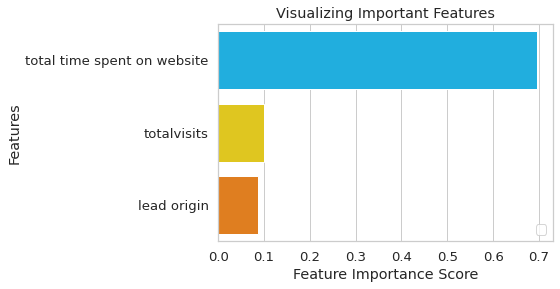

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp_T3, y=feature_imp_T3.index)
# Add labels to your graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()